<a href="https://colab.research.google.com/github/joyloruth/Sales-Prediction/blob/master/Ice_Cream_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Python Libraries**


*   pandas as pd

*   matplotlib pyplot

*   seaborn as sns










In [ ]:
pip install matplotlib

In [6]:
from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

In [9]:
import seaborn as sns

In [8]:
import pandas as pd

In [12]:
import sklearn

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Import Raw Data

In [22]:
icecream = pd.read_csv('/content/raw_icecream_data.csv')

Make 2 Copies of Data

In [11]:
icecream2 = icecream.copy()
icecream3 = icecream.copy()

view raw dataframe "icecream"

In [18]:
icecream2

,Celsius,Revenue,Fahrenheit
0,24.566884,534.799028,76.220392
1,26.005191,625.190122,78.809344
2,27.790554,660.632289,82.022997
3,20.595335,487.706960,69.071603
4,11.503498,316.240194,52.706296
...,...,...,...
495,22.274899,524.746364,72.094819
496,32.893092,755.818399,91.207566
497,12.588157,306.090719,54.658683
498,22.362402,566.217304,72.252324


# **Data Cleaning**


Remove Celsius Column

In [ ]:
icecream = icecream.drop(['Celsius'], axis=1)

Change Farhenheit column name to Temperature

In [35]:
icecream.columns

Index(['Revenue', ' Fahrenheit'], dtype='object')

In [36]:
new_column_names = ['Revenue', 'Temperature']

In [37]:
icecream.columns = new_column_names

In [40]:
icecream[0:100]

,Revenue,Temperature
0,534.799028,76.220392
1,625.190122,78.809344
2,660.632289,82.022997
3,487.706960,69.071603
4,316.240194,52.706296
...,...,...
95,212.591740,48.233948
96,474.749392,68.477022
97,460.402500,66.853676
98,343.362905,58.434700


# **Exploratory Data**

In [41]:
icecream

,Revenue,Temperature
0,534.799028,76.220392
1,625.190122,78.809344
2,660.632289,82.022997
3,487.706960,69.071603
4,316.240194,52.706296
...,...,...
495,524.746364,72.094819
496,755.818399,91.207566
497,306.090719,54.658683
498,566.217304,72.252324


In [42]:
icecream.describe()

,Revenue,Temperature
count,500.000000,500.000000
mean,521.570777,72.018005
std,175.404751,14.573498
min,10.000000,32.000000
25%,405.558681,62.820064
50%,529.368565,72.307023
75%,642.257922,81.933214
max,1000.000000,113.000000


In [43]:
icecream.tail()

,Revenue,Temperature
495,524.746364,72.094819
496,755.818399,91.207566
497,306.090719,54.658683
498,566.217304,72.252324
499,655.660388,84.123925


In [44]:
icecream.head()

,Revenue,Temperature
0,534.799028,76.220392
1,625.190122,78.809344
2,660.632289,82.022997
3,487.706960,69.071603
4,316.240194,52.706296


In [45]:
icecream.info

<bound method DataFrame.info of         Revenue  Temperature
0    534.799028    76.220392
1    625.190122    78.809344
2    660.632289    82.022997
3    487.706960    69.071603
4    316.240194    52.706296
..          ...          ...
495  524.746364    72.094819
496  755.818399    91.207566
497  306.090719    54.658683
498  566.217304    72.252324
499  655.660388    84.123925

[500 rows x 2 columns]>

# **Analysis**

# **Correlation**

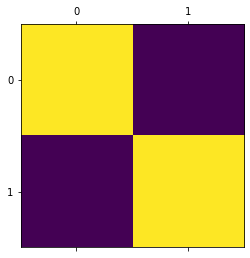

In [46]:
corr = icecream.corr()
plt.matshow(corr)

# **Temperature Histogram**

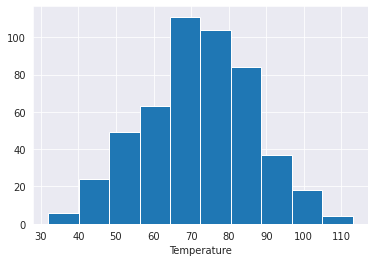

In [68]:
x = icecream['Temperature']
plt.hist(x, bins=10)
plt.xlabel('Temperature')
plt.show()

# **Revenue Histogram**

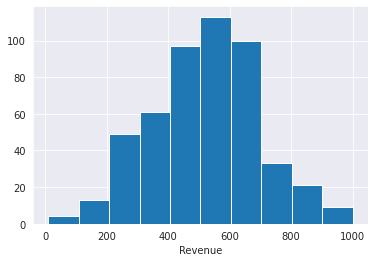

In [71]:
y = icecream['Revenue']
plt.hist(y,bins=10)
plt.xlabel('Revenue')
plt.show()

# **Linear Regression**

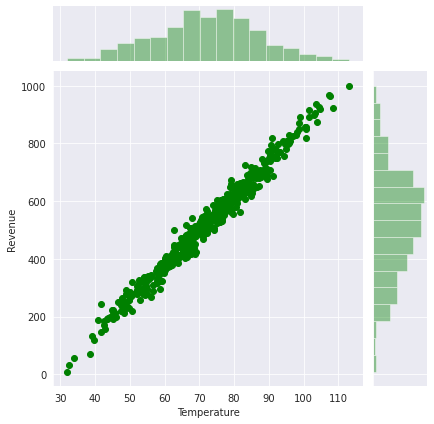

In [108]:
sns.jointplot(x='Temperature',y='Revenue', data=icecream, color = "green")

# **Train and Test Model**

In [98]:
icecream_test = icecream.copy()

In [88]:
test = icecream_train.drop(['Temperature'],axis=1)

In [101]:
icecream_train = icecream.copy()

In [102]:
train = icecream_test.drop(['Revenue'],axis=1)

In [105]:
test[0:10]

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
5,367.940744
6,308.894518
7,696.716640
8,55.390338
9,737.800824


In [106]:
train[0:10]

,Temperature
0,76.220392
1,78.809344
2,82.022997
3,69.071603
4,52.706296
5,57.834525
6,56.674004
7,87.501173
8,33.758366
9,89.005036


In [107]:
x_train,x_test,y_train,y_test = train_test_split(train, test, test_size = 0.3, random_state = 2 )

In [110]:
regr = LinearRegression()

In [111]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
prediction = regr.predict(x_test)

In [115]:
prediction[0:15]

array([[737.44194873],
       [655.44220417],
       [710.33267045],
       [582.50912634],
       [507.2829981 ],
       [486.36915514],
       [602.81244506],
       [386.95400669],
       [797.29777184],
       [596.82740764],
       [511.81119715],
       [520.3804034 ],
       [283.42008965],
       [484.48643195],
       [672.26387624]])

In [116]:
regr.score(x_test,y_test)

0.9754909128487228